# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | selfoss
Processing Record 3 of Set 1 | korla
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | lerwick
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | sabang
Processing Record 12 of Set 1 | shenkursk
Processing Record 13 of Set 1 | vilyuchinsk
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | tanout
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | tazovsky
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | sur
Processing Reco

Processing Record 38 of Set 4 | alamo
Processing Record 39 of Set 4 | punta arenas
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | minas de marcona
Processing Record 42 of Set 4 | lycksele
Processing Record 43 of Set 4 | nar'yan-mar
Processing Record 44 of Set 4 | savave village
City not found. Skipping...
Processing Record 45 of Set 4 | villa yapacani
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | namsos
Processing Record 48 of Set 4 | kouango
Processing Record 49 of Set 4 | anadyr
Processing Record 0 of Set 5 | puerto colombia
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | kaa-khem
Processing Record 4 of Set 5 | haiku-pauwela
Processing Record 5 of Set 5 | crane
Processing Record 6 of Set 5 | keflavik
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | balkashino
Processing Record 9 of Set 5 | tual
Processing Record 10 of Set 5 | mahaj

City not found. Skipping...
Processing Record 31 of Set 8 | guarapari
Processing Record 32 of Set 8 | aginskoye
Processing Record 33 of Set 8 | ebon
Processing Record 34 of Set 8 | santa ana
Processing Record 35 of Set 8 | suwayr
Processing Record 36 of Set 8 | arkhangel'sk
Processing Record 37 of Set 8 | port mathurin
Processing Record 38 of Set 8 | genhe
Processing Record 39 of Set 8 | hangu
Processing Record 40 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 41 of Set 8 | cerro azul
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | lembar
City not found. Skipping...
Processing Record 44 of Set 8 | tabou
Processing Record 45 of Set 8 | kodinsk
Processing Record 46 of Set 8 | tulum
Processing Record 47 of Set 8 | molepolole
Processing Record 48 of Set 8 | uglegorsk
Processing Record 49 of Set 8 | rurrenabaque
Processing Record 0 of Set 9 | sandnessjoen
Processing Record 1 of Set 9 | anacapri
Processing Record 2 of Set 9 | hammerfest
Proce

Processing Record 16 of Set 12 | puerto santa
Processing Record 17 of Set 12 | bodo
Processing Record 18 of Set 12 | puerto aysen
Processing Record 19 of Set 12 | cockburn town
Processing Record 20 of Set 12 | khandud
Processing Record 21 of Set 12 | bantilan
Processing Record 22 of Set 12 | huai'an
Processing Record 23 of Set 12 | dwarka
Processing Record 24 of Set 12 | arraial do cabo
Processing Record 25 of Set 12 | kananga
Processing Record 26 of Set 12 | yeppoon
Processing Record 27 of Set 12 | aldinga beach
Processing Record 28 of Set 12 | puerto armuelles
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | phan rang-thap cham
Processing Record 31 of Set 12 | rengo
Processing Record 32 of Set 12 | coyhaique
Processing Record 33 of Set 12 | dunedin
Processing Record 34 of Set 12 | awjilah
Processing Record 35 of Set 12 | taguatinga
Processing Record 36 of Set 12 | el quebrachal
Processing Record 37 of Set 12 | mangrol
Processing Record 38 of Set 12 | mount

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [91]:
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 273.15) * 9/5 + 32
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                 
0        grytviken -54.2811  -36.5092    36.032        97         100   
1          selfoss  63.9331  -20.9971    50.036        61          86   
2            korla  41.7597   86.1469    67.316        30          83   
3            tiksi  71.6872  128.8694    26.564        85         100   
4         kingston  17.9970  -76.7936    92.246        68          20   

         Wind Speed Country        Date  Max Temp (°F)  
City_ID                                                 
0              5.91      GS  1696263299         36.032  
1              6.23      IS  1696263246         50.036  
2              3.01      CN  1696263452         67.316  
3              3.66      RU  1696263146         26.564  
4              1.54      JM  1696263297         92.246

In [92]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [93]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                 
0        grytviken -54.2811  -36.5092    36.032        97         100   
1          selfoss  63.9331  -20.9971    50.036        61          86   
2            korla  41.7597   86.1469    67.316        30          83   
3            tiksi  71.6872  128.8694    26.564        85         100   
4         kingston  17.9970  -76.7936    92.246        68          20   

         Wind Speed Country        Date  Max Temp (°F)  
City_ID                                                 
0              5.91      GS  1696263299         36.032  
1              6.23      IS  1696263246         50.036  
2              3.01      CN  1696263452         67.316  
3              3.66      RU  1696263146         26.564  
4              1.54      JM  1696263297         92.246

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

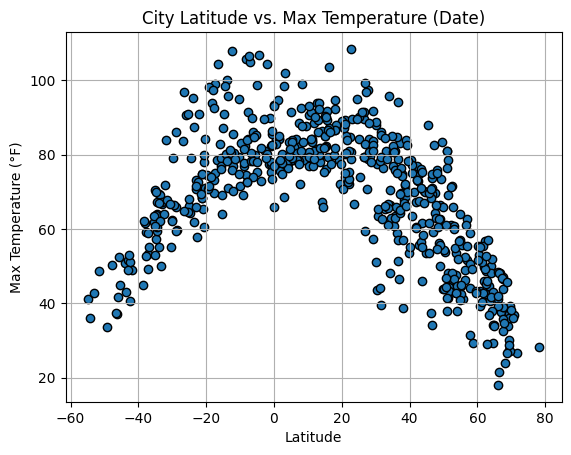

In [94]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker ="o", edgecolors=["black"])

# Get the date 
date = pd.to_datetime(city_data_df["Date"][0], unit="s").strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

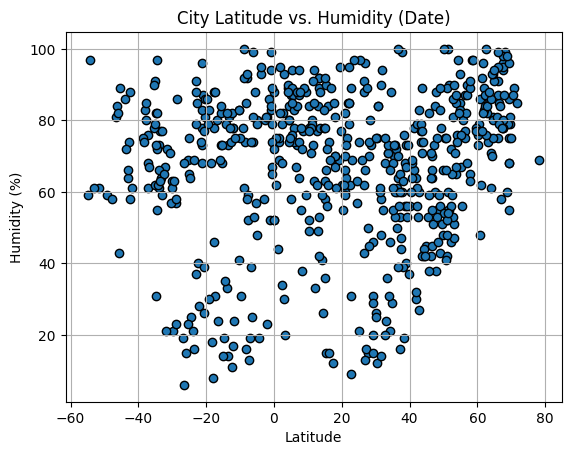

In [95]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker ="o", edgecolors=["black"])

# Get the date 
date = pd.to_datetime(city_data_df["Date"][0], unit="s").strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

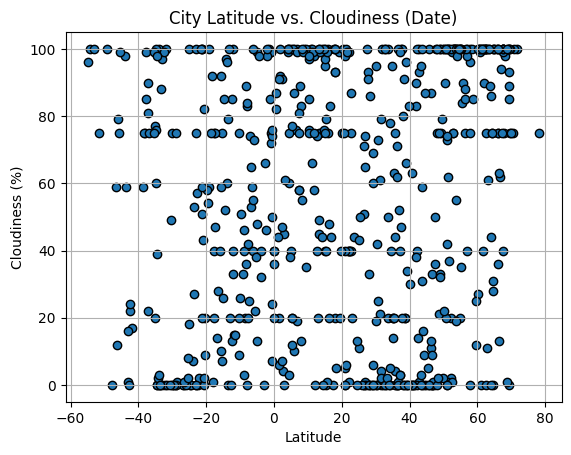

In [96]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker ="o", edgecolors=["black"])

# Get the date 
date = pd.to_datetime(city_data_df["Date"][0], unit="s").strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

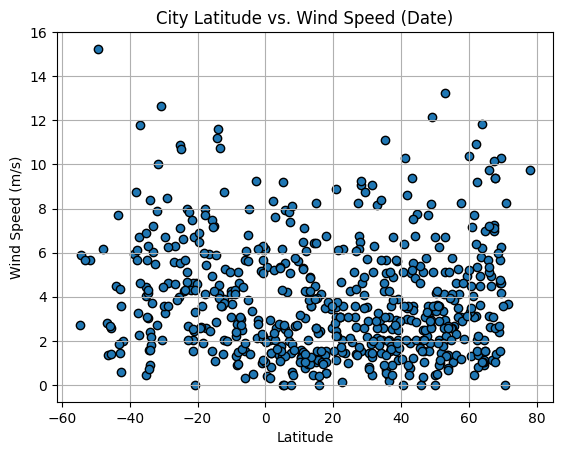

In [97]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker ="o", edgecolors=["black"])

# Get the date 
date = pd.to_datetime(city_data_df["Date"][0], unit="s").strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    model = LinearRegression()
    
    x_values = x_values.values.reshape(-1, 1)
    model.fit(x_values, y_values)
    
    # Perform linear regression
    slope = model.coef_[0]
    intercept = model.intercept_
    regress_values = model.predict(x_values)
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Calculate the R-squared value
    r_squared = model.score(x_values, y_values)
    print(f"The R-squared is: {r_squared:.2f}")
    
    # Manually add the equation text to the plot
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x_values.min(), y_values.min(), equation_text, fontsize=12, color="red")
    
    
    plt.show()

In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                
1         selfoss  63.9331  -20.9971    50.036        61          86   
2           korla  41.7597   86.1469    67.316        30          83   
3           tiksi  71.6872  128.8694    26.564        85         100   
4        kingston  17.9970  -76.7936    92.246        68          20   
5        qaqortoq  60.7167  -46.0333    43.430        48         100   

         Wind Speed Country        Date  Max Temp (°F)  
City_ID                                                 
1              6.23      IS  1696263246         50.036  
2              3.01      CN  1696263452         67.316  
3              3.66      RU  1696263146         26.564  
4              1.54      JM  1696263297         92.246  
5              1.33      GL  1696263453         43.430

In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                          grytviken -54.2811  -36.5092    36.032        97   
8        edinburgh of the seven seas -37.0676  -12.3116    49.154        61   
14                 port-aux-francais -49.3500   70.2167    33.512        59   
15                           ushuaia -54.8000  -68.3000    41.054        59   
24                          waitangi -43.9535 -176.5597    50.828        86   

         Cloudiness  Wind Speed Country        Date  Max Temp (°F)  
City_ID                                                             
0               100        5.91      GS  1696263299         36.032  
8                81       11.77      SH  1696262928         49.154  
14              100       15.24      TF  1696262956         33.512  
15               96        2.72      AR  1696262923         41.054  
24               98        4.47      NZ  1696262917         50.828

###  Temperature vs. Latitude Linear Regression Plot

The R-squared is: 0.66


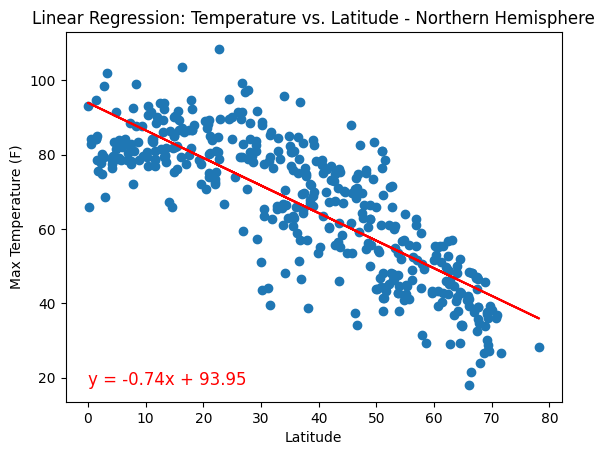

In [101]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Linear Regression: Temperature vs. Latitude - Northern Hemisphere", (10, 20))

The R-squared is: 0.58


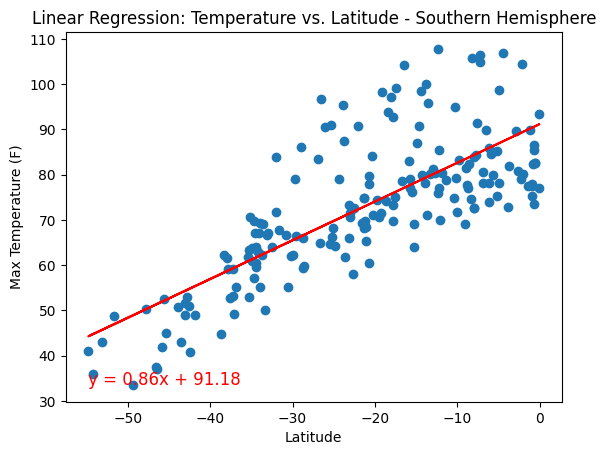

In [102]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Linear Regression: Temperature vs. Latitude - Southern Hemisphere", (10, 20))

**Discussion about the linear relationship:** 
 - Negative slope in Northern Hemisphere: As you move north from the equator, Max Temperature tends to decrease.
 - Positive slope in Southern Hemisphere: As you move south from the equator, Max Temperature tends to decrease.
 
In both hemispheres, Latitude is a significant predictor of Max Temperature, with clear linear trends.

### Humidity vs. Latitude Linear Regression Plot

The R-squared is: 0.02


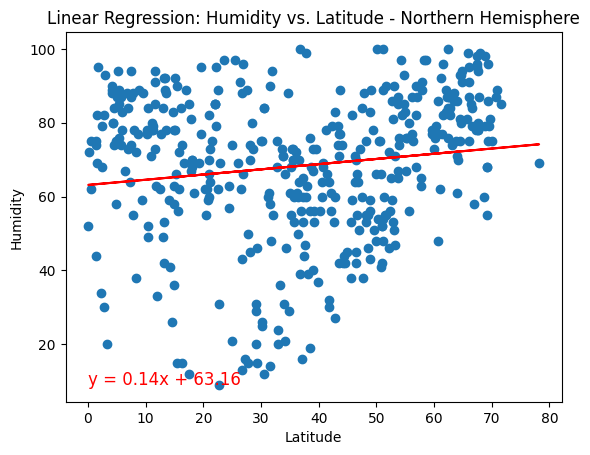

In [103]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Linear Regression: Humidity vs. Latitude - Northern Hemisphere", (10, 20))

The R-squared is: 0.00


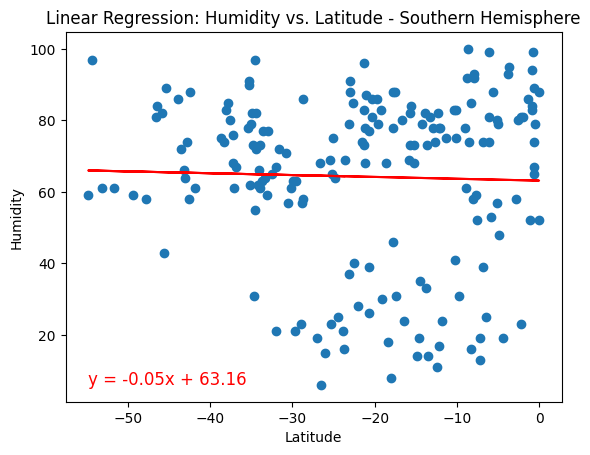

In [104]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Linear Regression: Humidity vs. Latitude - Southern Hemisphere", (10, 20))

**Discussion about the linear relationship:** 
 - In the Northern Hemisphere, there is a very weak positive linear relationship between Latitude and Humidity, but the relationship is not practically significant due to the low R-squared value.
 - In the Southern Hemisphere, there is no meaningful linear relationship between Latitude and Humidity as indicated by both the low R-squared value and the nearly flat slope.
 
These findings suggest that Latitude may not be a strong predictor of Humidity in either hemisphere, and other factors likely play a more significant role in determining Humidity levels.
 

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: 0.01


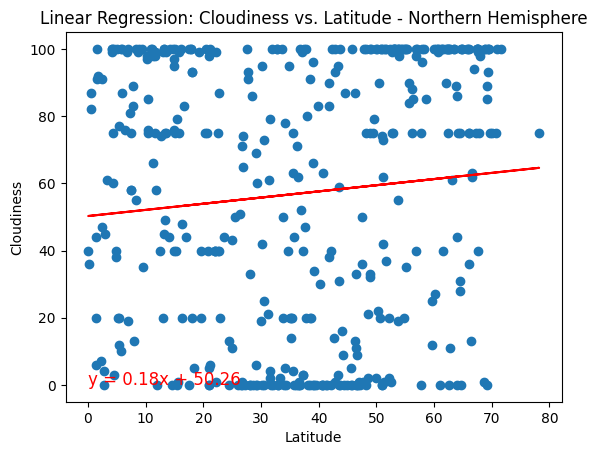

In [105]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Linear Regression: Cloudiness vs. Latitude - Northern Hemisphere", (10, 20))

The R-squared is: 0.00


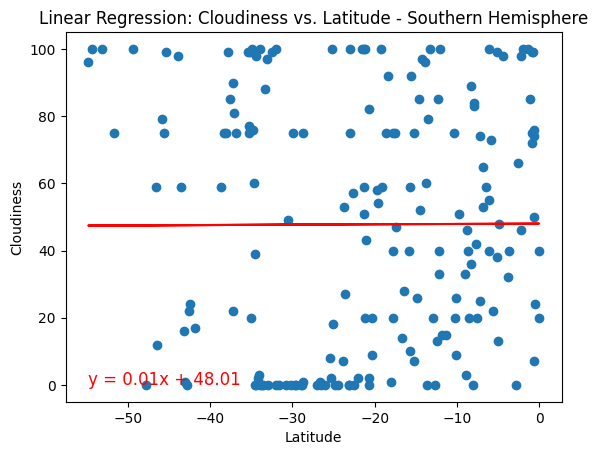

In [106]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Linear Regression: Cloudiness vs. Latitude - Southern Hemisphere", (10, 20))

**Discussion about the linear relationship:** 
 - In the Northern Hemisphere, there is a very weak positive linear relationship between Latitude and Cloudiness, but the relationship is not practically significant due to the low R-squared value.
 - In the Southern Hemisphere, there is no meaningful linear relationship between Latitude and Cloudiness, as indicated by both the low R-squared value and the nearly flat slope.
 
These findings suggest that Latitude is not a strong predictor of Cloudiness in either hemisphere, and other factors likely have a more significant impact on Cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared is: 0.02


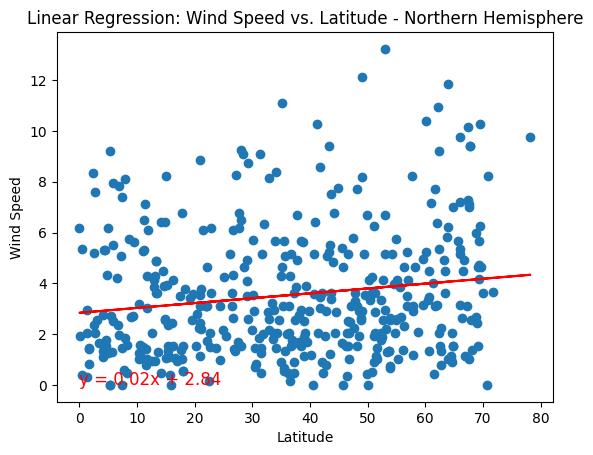

In [107]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Linear Regression: Wind Speed vs. Latitude - Northern Hemisphere", (10, 40))

The R-squared is: 0.01


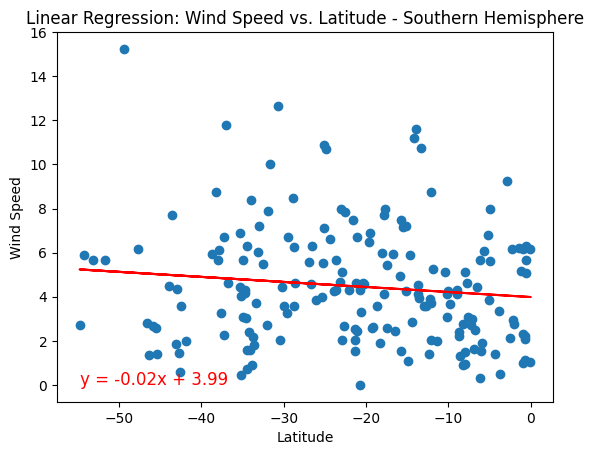

In [108]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Linear Regression: Wind Speed vs. Latitude - Southern Hemisphere", (10, 20))

**Discussion about the linear relationship:**
 - In both the Northern and Southern Hemispheres, there is a very weak linear relationship between Latitude and Wind Speed. The R-squared values are low, indicating that Latitude has limited explanatory power for Wind Speed in either hemisphere.
 - The slopes in both hemispheres are close to zero, indicating that the change in Wind Speed with Latitude is minimal. While there is a slight positive trend in the Northern Hemisphere and a slight negative trend in the Southern Hemisphere, these trends are not practically significant.
 
These findings suggest that Latitude is not a strong predictor of Wind Speed in either hemisphere, and other factors, such as local geography and weather patterns, likely have a more significant influence on Wind Speed.